## Analysing Music Corpus
Contributors : Soeb Hussain | Sayali Dalvi | Dushyant Mahajan

### The Data
A Spotify music corpus containing features like track name, track album, album release date, track artist and artist popularity.

In [49]:
import pandas

import seaborn as sns
sns.set_context('notebook')

import numpy as np
import pandas as pd
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline


In [50]:
spotify_data = pd.read_csv('spotify_songs.csv')
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [52]:
spotify_data.shape

(32833, 23)

Let's extract the required columns

In [53]:
df = spotify_data[['track_name','track_artist','track_popularity']].sort_values(by=['track_popularity'])
df.tail()

,track_name,track_artist,track_popularity
21468,ROXANNE,Arizona Zervas,99
20092,ROXANNE,Arizona Zervas,99
23104,ROXANNE,Arizona Zervas,99
1551,Dance Monkey,Tones and I,100
20091,Dance Monkey,Tones and I,100


In [54]:
df[df['track_artist'] == 'Dua Lipa']

,track_name,track_artist,track_popularity
22376,Thinking 'Bout You,Dua Lipa,33
28059,Don't Start Now - Kungs Remix,Dua Lipa,47
329,IDGAF - Hazers Remix,Dua Lipa,50
10920,New Rules - Alison Wonderland Remix,Dua Lipa,53
3801,IDGAF,Dua Lipa,60
22368,I'd Rather Go Blind - Live,Dua Lipa,60
3766,Last Dance,Dua Lipa,62
3794,New Rules,Dua Lipa,63
190,Don't Start Now - Kungs Remix,Dua Lipa,65
3765,Hotter Than Hell,Dua Lipa,66


## Data Preprocessing

Let's remove the duplicates

In [55]:
df = df.drop_duplicates()
df

,track_name,track_artist,track_popularity
11645,El Laberinto - Live,Miguel Rios,0
18994,Un Sueño,R.K.M & Ken-Y,0
19127,No Es Culpa Mía,DY,0
19160,Web Cam,Farruko,0
19168,Sexo Seguro,"Franco ""El Gorilla""",0
...,...,...,...
30201,Tusa,KAROL G,98
23107,Memories,Maroon 5,98
1301,Circles,Post Malone,98
30202,ROXANNE,Arizona Zervas,99


In [56]:
df[df['track_artist'] == 'Dua Lipa']

,track_name,track_artist,track_popularity
22376,Thinking 'Bout You,Dua Lipa,33
28059,Don't Start Now - Kungs Remix,Dua Lipa,47
329,IDGAF - Hazers Remix,Dua Lipa,50
10920,New Rules - Alison Wonderland Remix,Dua Lipa,53
3801,IDGAF,Dua Lipa,60
22368,I'd Rather Go Blind - Live,Dua Lipa,60
3766,Last Dance,Dua Lipa,62
3794,New Rules,Dua Lipa,63
190,Don't Start Now - Kungs Remix,Dua Lipa,65
3765,Hotter Than Hell,Dua Lipa,66


In [57]:
df = df.drop_duplicates(subset=['track_artist', 'track_name'], keep='last')
df[df['track_artist']=='Dua Lipa']

,track_name,track_artist,track_popularity
22376,Thinking 'Bout You,Dua Lipa,33
329,IDGAF - Hazers Remix,Dua Lipa,50
10920,New Rules - Alison Wonderland Remix,Dua Lipa,53
22368,I'd Rather Go Blind - Live,Dua Lipa,60
3766,Last Dance,Dua Lipa,62
190,Don't Start Now - Kungs Remix,Dua Lipa,65
3765,Hotter Than Hell,Dua Lipa,66
2979,Be the One,Dua Lipa,68
3751,Blow Your Mind (Mwah),Dua Lipa,70
2623,Swan Song,Dua Lipa,70


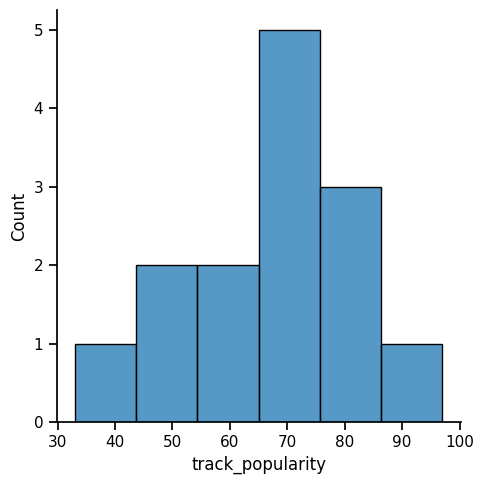

In [58]:
sns.displot(df[df['track_artist'] == 'Dua Lipa']['track_popularity'])

In [176]:
uni_artists = list(df['track_artist'].unique())
len(uni_artists)

10693

Slicing the data

In [177]:
artist_df = df.groupby("track_artist") \
    .agg({'track_name' : 'size', "track_popularity" : 'mean'}) \
    .rename(columns={'track_name':'count','track_popularity':'popularity'}) \
    .sort_values(['count','popularity'], ascending=False) \
    .reset_index()
artist_df

,track_artist,count,popularity
0,Queen,111,41.099099
1,Martin Garrix,73,46.164384
2,David Guetta,64,51.093750
3,Logic,62,43.129032
4,Hardwell,61,36.836066
...,...,...,...
10687,nej!las,1,0.000000
10688,starRo,1,0.000000
10689,БРАТУБРАТ,1,0.000000
10690,Нагора,1,0.000000


Now we will filter the data to extract the artists having more than 35 songs released and having popularity more than 30

In [193]:
filter1 = artist_df["count"] > 35
filter2 = artist_df["popularity"]> 30
artist_df1 = artist_df[filter1 & filter2]
artist_df1

,track_artist,count,popularity
0,Queen,111,41.099099
1,Martin Garrix,73,46.164384
2,David Guetta,64,51.093750
3,Logic,62,43.129032
4,Hardwell,61,36.836066
5,Don Omar,59,45.711864
6,The Chainsmokers,56,53.178571
7,Dimitri Vegas & Like Mike,56,39.500000
8,Drake,47,51.553191
9,Calvin Harris,46,50.913043


In [194]:
filter_df = spotify_data[spotify_data['track_artist'].isin(artist_df1['track_artist'].unique())]
cleared_df = filter_df[["track_artist","track_name","track_popularity"]].sort_values(by=['track_artist']).reset_index()
cleared_df.shape

(2039, 4)

Adding the index columns

In [195]:
uni = artist_df1['track_artist'].unique()
uni = pd.DataFrame(uni, columns=['artist_unique'])
uni

,artist_unique
0,Queen
1,Martin Garrix
2,David Guetta
3,Logic
4,Hardwell
5,Don Omar
6,The Chainsmokers
7,Dimitri Vegas & Like Mike
8,Drake
9,Calvin Harris


In [196]:
cleared_df['artist_idx'] = cleared_df.apply(lambda x: uni[uni.artist_unique == x.track_artist].index[0] , axis=1)
cleared_df

,index,track_artist,track_name,track_popularity,artist_idx
0,9660,2Pac,California Love - Original Version (Explicit),4,16
1,9178,2Pac,Dear Mama,0,16
2,9179,2Pac,Ready Or Not,0,16
3,9187,2Pac,All Eyez On Me,75,16
4,9189,2Pac,2 Of Amerikaz Most Wanted,1,16
...,...,...,...,...,...
2034,28073,Tiësto,Ritual - Benny Benassi & BB Team Remix,56,14
2035,28039,Tiësto,Wasted - Ummet Ozcan Remix,39,14
2036,27971,Tiësto,Red Lights,5,14
2037,31790,Tiësto,Red Lights,69,14


### Hierarchical Regression

We build a linear regression model to predict artist's popularity based upon his track popularity.

In [197]:
with pm.Model() as hierarchical_model:
    # Hyperpriors
    mu_a = pm.Normal('mu_alpha', mu=0., sigma=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=1)
    mu_b = pm.Normal('mu_beta', mu=0., sigma=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta=1)
    
    # Intercept for each artist, distributed around group mean mu_a
    a = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, shape=len(uni))
    
    # Intercept for each artist, distributed around group mean mu_b
    b = pm.Normal('beta', mu=mu_b, sigma=sigma_b, shape=len(uni))
    
    # Model error
    eps = pm.HalfCauchy('eps', beta=1)
    
    # Expected value
    radon_est = a[cleared_df['artist_idx']] + b[cleared_df['artist_idx']] * cleared_df.artist_idx
    
    # Data likelihood
    y_like = pm.Normal('y_like', mu=radon_est, sigma=eps, observed=cleared_df.track_popularity)

/usr/local/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, beta, alpha, sigma_beta, mu_beta, sigma_alpha, mu_alpha]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 80 seconds.
There were 79 divergences after tuning. Increase `target_accept` or reparameterize.
There were 439 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/var/folders/39/mqdgthl10hqf0_2g602x03_m0000gp/T/ipykernel_12397/352217382.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


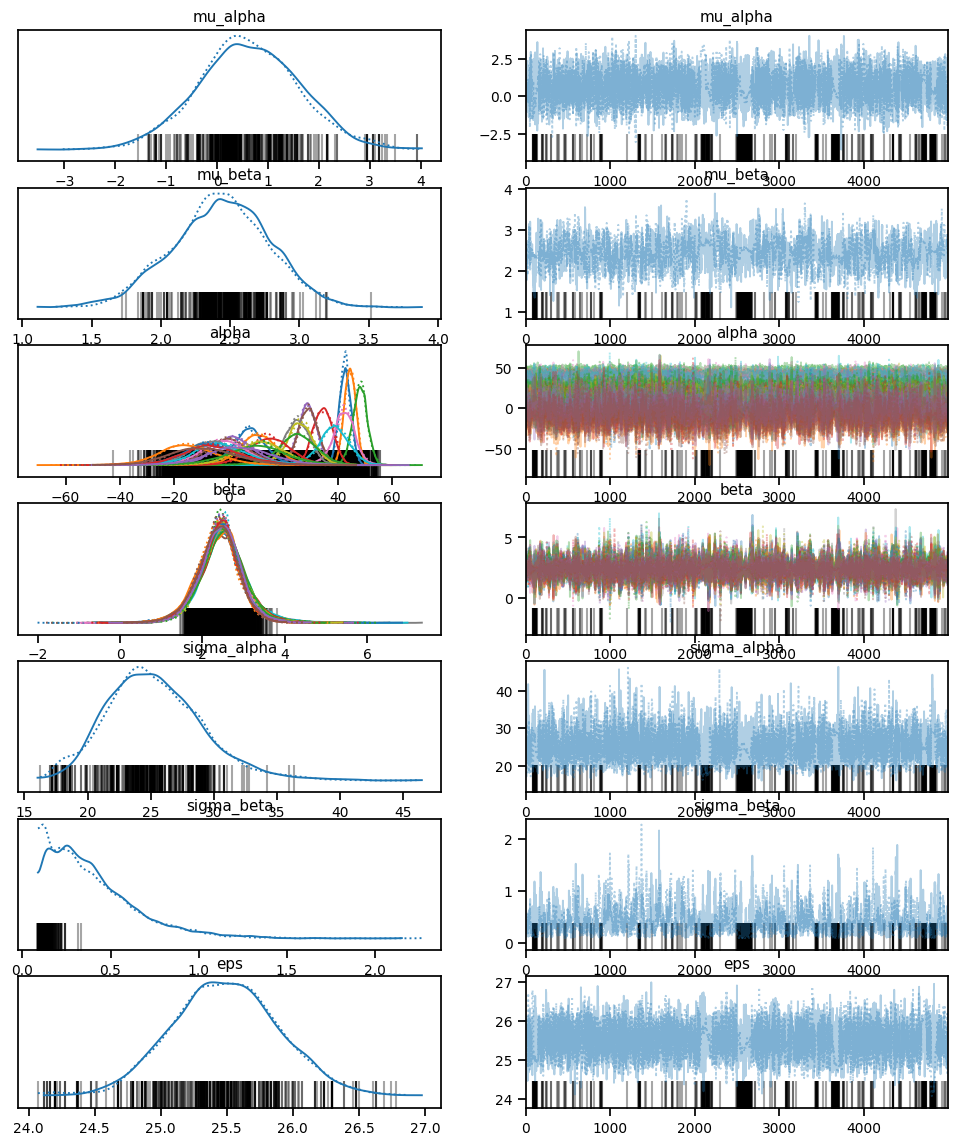

In [198]:
with hierarchical_model:
    trace = pm.sample(5000, tune=1000, cores=2)
    pm.traceplot(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

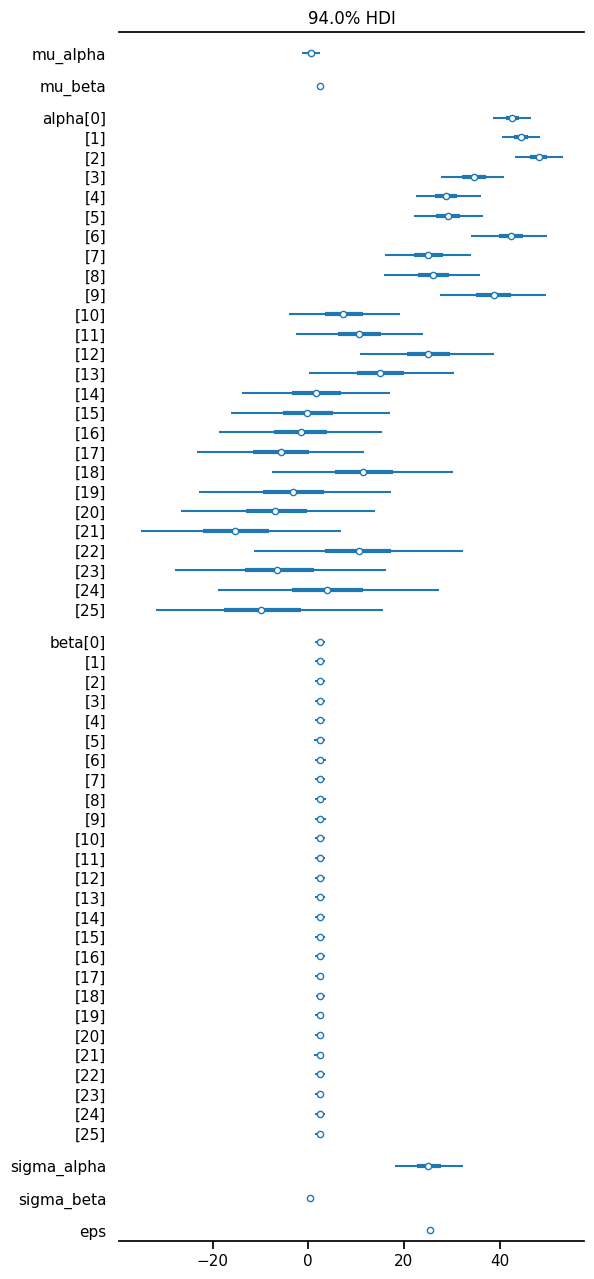

In [199]:
import arviz as az
az.plot_forest(trace, combined=True)

In [200]:
trace['alpha'].shape

(10000, 26)

In [201]:
trace['beta'].shape

(10000, 26)

In [202]:
pm.stats.hdi(trace['alpha'])

/var/folders/39/mqdgthl10hqf0_2g602x03_m0000gp/T/ipykernel_12397/268572651.py:1: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  pm.stats.hdi(trace['alpha'])


array([[ 38.66617871,  46.6063949 ],
       [ 40.54995706,  48.35434375],
       [ 43.17030448,  53.30219056],
       [ 27.65135115,  40.96081795],
       [ 22.58566093,  36.19774325],
       [ 22.02184206,  36.49598972],
       [ 34.0075542 ,  49.97762057],
       [ 16.10686022,  34.01094826],
       [ 15.82213547,  35.89661167],
       [ 27.63008613,  49.68771628],
       [ -4.07916589,  19.21079404],
       [ -2.53967437,  24.01345976],
       [ 10.87574292,  38.76887877],
       [  0.22330669,  30.4499861 ],
       [-13.74486516,  17.16128308],
       [-16.22253544,  17.00981152],
       [-18.74114366,  15.38152499],
       [-23.20579509,  11.71236961],
       [ -7.5880581 ,  30.17116396],
       [-22.76895939,  17.28854588],
       [-26.61075324,  13.89290209],
       [-35.02836776,   6.85228368],
       [-11.27615727,  32.37010228],
       [-27.90888797,  16.30269511],
       [-18.80832523,  27.41581613],
       [-31.80714986,  15.5470695 ]])

In [203]:
import scipy as sp
sp.stats.mstats.mquantiles(trace['alpha'], axis=0)

masked_array(
  data=[[ 41.24759911,  43.07129456,  46.43315511,  32.12677108,
          26.50630472,  26.79633184,  39.83243516,  22.07203079,
          22.96628783,  35.08788702,   3.54031519,   6.2514357 ,
          20.5610893 ,  10.24383921,  -3.35885701,  -5.37393443,
          -7.14812393, -11.55411913,   5.57004121,  -9.464414  ,
         -13.01954918, -21.89286866,   3.41218535, -13.19944729,
          -3.36955942, -17.62632425],
        [ 42.66826526,  44.51680614,  48.19575458,  34.58628457,
          28.7790721 ,  29.22309858,  42.38885008,  25.12339172,
          26.1288538 ,  38.71670163,   7.36022809,  10.71395154,
          25.12566679,  14.97742401,   1.5998718 ,  -0.17919628,
          -1.57132328,  -5.78029316,  11.54118907,  -3.26854451,
          -6.87351623, -15.34732709,  10.61626882,  -6.45287769,
           3.93223682,  -9.80105927],
        [ 44.02399177,  45.97198939,  49.87378384,  37.07638972,
          31.15528075,  31.70845627,  44.94593568,  28.1813652 ,


In [204]:
np.quantile(trace['alpha'], 0.5)

14.657860640083674

In [205]:
uni.artist_unique.values

array(['Queen', 'Martin Garrix', 'David Guetta', 'Logic', 'Hardwell',
       'Don Omar', 'The Chainsmokers', 'Dimitri Vegas & Like Mike',
       'Drake', 'Calvin Harris', "Guns N' Roses", 'Gloria Estefan',
       'Daddy Yankee', 'The Cranberries', 'Tiësto', 'Steve Aoki', '2Pac',
       'Eminem', 'The Weeknd', 'R3HAB', 'Armin van Buuren', 'Major Lazer',
       'Kygo', 'Avicii', 'Ozuna', 'The Notorious B.I.G.'], dtype=object)

/var/folders/39/mqdgthl10hqf0_2g602x03_m0000gp/T/ipykernel_12397/1330390867.py:1: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  df_hpd = pd.DataFrame(pm.stats.hdi(trace['alpha']),


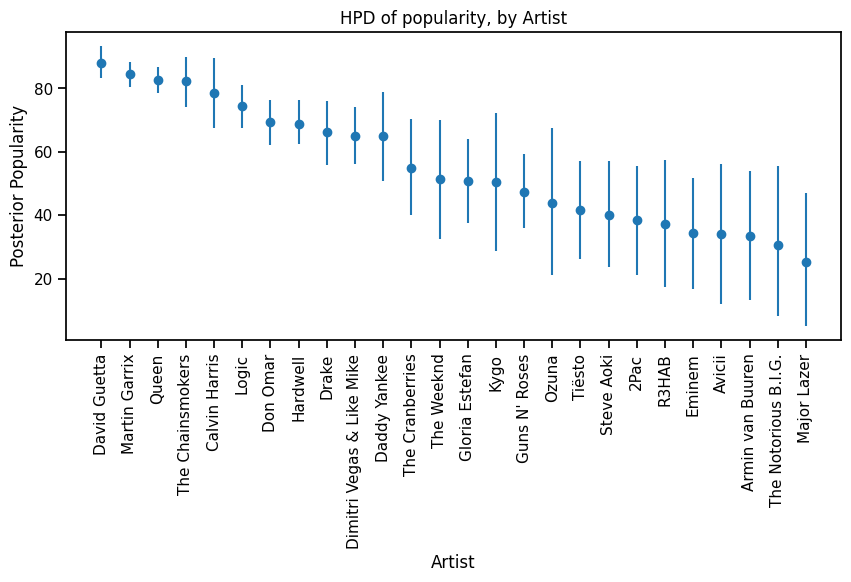

In [210]:
df_hpd = pd.DataFrame(pm.stats.hdi(trace['alpha']),
                      columns=['hpd_low', 'hpd_high'], index=uni.artist_unique.values)
df_median = pd.DataFrame(trace['alpha'].mean(axis=0),
                         columns=['hpd_median'], index=uni.artist_unique.values)

df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median',ascending=False)
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(10,4))
axs.errorbar(df_hpd.x, df_hpd.hpd_median + 40,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('HPD of popularity, by Artist')
axs.set_xlabel('Artist')
axs.set_ylabel('Posterior Popularity')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=90)

### We can conclude that David Guetta is the most popular artist based on the popularity of his previously released songs